Importing Libraries

Importing Training Dataset

In [1]:
filepath = 'C:/Users/Rutwik/OneDrive/Desktop/Twitter Bots vs Humans/kaggle_data'
file = filepath + '/training_data.csv'

training_dataset = pd.read_csv(file)
training_dataset.head()

NameError: name 'pd' is not defined

Identifying missing values with heatmaps (Nan Values)

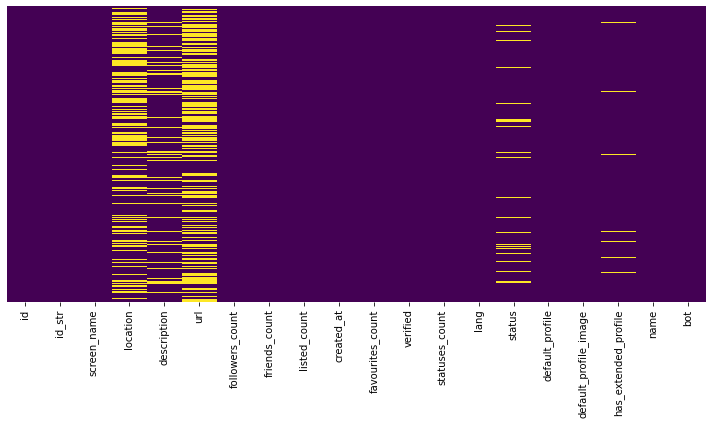

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(training_dataset.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.tight_layout()
plt.show()

In [ ]:
bots = training_dataset[training_dataset.bot==1]
nonbots = training_dataset[training_dataset.bot==0]
bots.shape

(1321, 20)

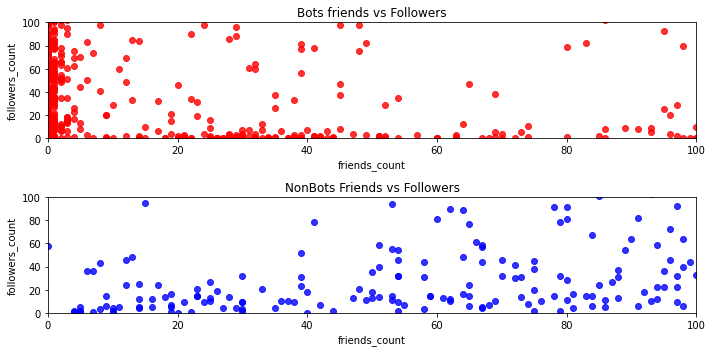

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
training_dataset['friends_by_followers'] = training_dataset.friends_count/training_dataset.followers_count
training_dataset[training_dataset.friends_by_followers < 1].shape

(1764, 21)

(504, 20)


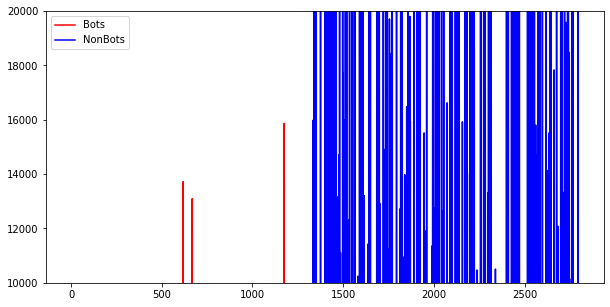

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

In [ ]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

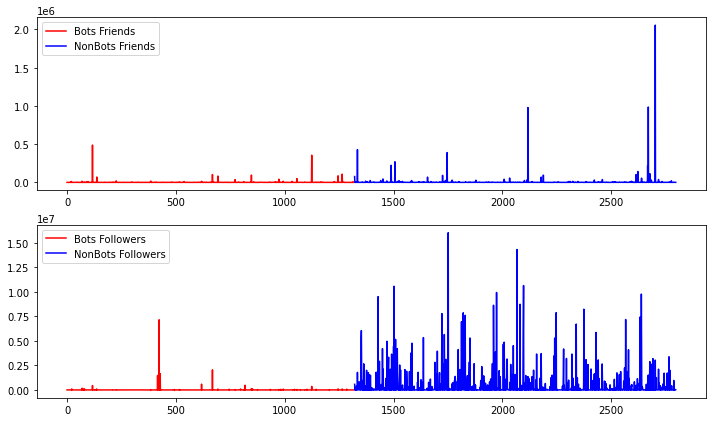

In [ ]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')

In [ ]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

training_dataset['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
training_dataset['location_binary'] = (bots.location.isnull())
training_dataset['verified_binary'] = (bots.verified==False)
training_dataset.shape

(2797, 24)

Spearman correlation

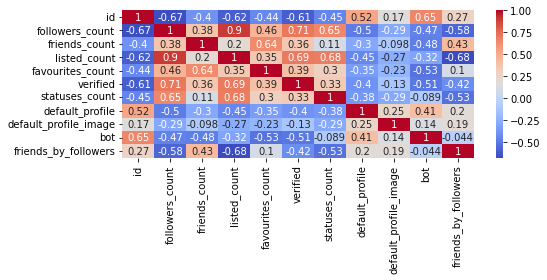

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(training_dataset.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

Feature Extraction

In [3]:
filepath = 'C:/Users/Rutwik/OneDrive/Desktop/Twitter Bots vs Humans/kaggle_data'
file = filepath + '/training_data.csv'

training_dataset = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_dataset['screen_name_binary'] = training_dataset.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_dataset['name_binary'] = training_dataset.name.str.contains(bag_of_words_bot, case=False, na=False)
training_dataset['description_binary'] = training_dataset.description.str.contains(bag_of_words_bot, case=False, na=False)
training_dataset['status_binary'] = training_dataset.status.str.contains(bag_of_words_bot, case=False, na=False)


training_dataset['listed_count_binary'] = (training_dataset.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

training_dataset[features].shape

(2797, 10)

Training the model with Neural Networks

In [4]:
x = training_dataset[features].iloc[:, :-1]
y = training_dataset[features].iloc[:, -1]

x = np.asarray(x).astype(np.float32)

#splitting dataset into training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10)


#training with ANN
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrices = {}
accuracies = {}

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units =10, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units =5, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   
hist = ann.fit(x_train, y_train, validation_data = (x_test, y_test),batch_size = 32, epochs = 300)

Epoch 1/300
70/70 [==============================] - 1s 3ms/step - loss: 128.7129 - accuracy: 0.6138 - val_loss: 482.8766 - val_accuracy: 0.6054
Epoch 2/300
70/70 [==============================] - 0s 1ms/step - loss: 87.3258 - accuracy: 0.6129 - val_loss: 345.6892 - val_accuracy: 0.6143
Epoch 3/300
70/70 [==============================] - 0s 1ms/step - loss: 75.4298 - accuracy: 0.6267 - val_loss: 193.5800 - val_accuracy: 0.6143
Epoch 4/300
70/70 [==============================] - 0s 1ms/step - loss: 61.1355 - accuracy: 0.6258 - val_loss: 203.7586 - val_accuracy: 0.6232
Epoch 5/300
70/70 [==============================] - 0s 1ms/step - loss: 41.3848 - accuracy: 0.6321 - val_loss: 290.9859 - val_accuracy: 0.6286
Epoch 6/300
70/70 [==============================] - 0s 1ms/step - loss: 55.0081 - accuracy: 0.6428 - val_loss: 142.7944 - val_accuracy: 0.6357
Epoch 7/300
70/70 [==============================] - 0s 1ms/step - loss: 39.0456 - accuracy: 0.6401 - val_loss: 87.0134 - val_accuracy:

[]

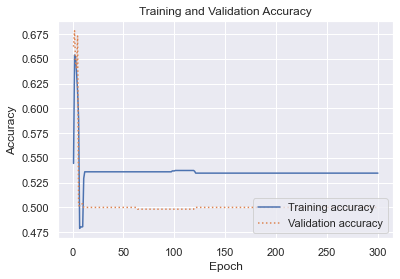

In [4]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [5]:
y_pred = ann.predict(x_test)

threshold = 0.5
y_pred = pd.DataFrame(y_pred, columns=["y_pred"])
y_pred = np.where(y_pred > threshold, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"recall : {recall_score(y_test, y_pred)}")
print(f"f1 : {f1_score(y_test, y_pred)}")


print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

Precision : 0.8611111111111112
recall : 0.23484848484848486
f1 : 0.36904761904761907
[[286  10]
 [202  62]]


0.6214285714285714

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_dataset[features].iloc[:,:-1]
y = training_dataset[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


In [8]:
print(f"Precision : {precision_score(y_test, y_pred_test)}")
print(f"recall : {recall_score(y_test, y_pred_test)}")
print(f"f1 : {f1_score(y_test, y_pred_test)}")

Precision : 0.9112271540469974
recall : 0.8369304556354916
f1 : 0.8725
